# Biodiversity in National Parks

## 1. The purpose of the project
For this project, I will be interpreting data from the National Parks Service about endangered speices in different parks. I will be performing some data ananlysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. 

## 2. Dataset 

I will be getting to know the dataset to elicit any meaningful patterns that can contribute the biodiveristy in National Park. 

In [172]:
#import modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [173]:
#import the species dataset into a pandas dataframe 
bio = pd.read_csv('species_info.csv')

In [174]:
#import the observations dataset into a pandas dataframe
obs = pd.read_csv('observations.csv')

## a. bio dataframe : getting to know the dataset

In [175]:
#print 'bio' 
bio

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


In [176]:
#print a concise summary of 'bio'
bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


### <b>There are 4 columns in the bio dataframe as below: </b>

1. <b>category</b>: class of an animal 
2. <b>scientifi_name </b>: scientific name of an animal - unique to a particular organism 
3. <b>common_names</b> : common name of an animal - there may be different common names for the same organism 
4. <b>conservation_status</b> = conservation status of an animal - indicating how likely an animal is to become extinct  

### <b>how many animals are there in our dataset? 

In [177]:
#count distinct observations 
bio['scientific_name'].nunique()

5541

### <b>According to the summary info, there are 5824 non-null entries in scientific_name. However, there are only 5542 distinct observations based on the result of the nunique method. Why is that?

In [182]:
#find duplicates on scientific name 
bio.duplicated(subset=['scientific_name']).value_counts()

False    5541
True      283
dtype: int64

In [185]:
duplicaterows = bio[bio['scientific_name'].duplicated()]

In [186]:
duplicaterows

,category,scientific_name,common_names,conservation_status
3017,Mammal,Cervus elaphus,Rocky Mountain Elk,NaN
3019,Mammal,Odocoileus virginianus,"White-Tailed Deer, White-Tailed Deer",NaN
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",NaN
3025,Mammal,Lutra canadensis,River Otter,NaN
...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",NaN
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",NaN
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",NaN
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",NaN


### <b>how many conservation statuses are there? 

In [102]:
bio.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

In [104]:
bio.columns

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

In [105]:
obs

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [106]:
bio

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


TypeError: unsupported operand type(s) for -: 'str' and 'float'

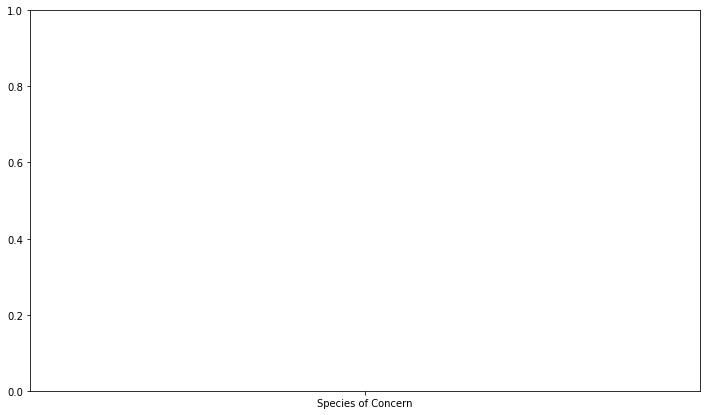

In [107]:
plt.subplots(figsize=(12,7))
ax = sns.histplot(data=bio,x='conservation_status')


In [108]:
bio.conservation_status.fillna('Safe')

0       Safe
1       Safe
2       Safe
3       Safe
4       Safe
        ... 
5819    Safe
5820    Safe
5821    Safe
5822    Safe
5823    Safe
Name: conservation_status, Length: 5824, dtype: object

In [109]:
bio.conservation_status.value_counts()

Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: conservation_status, dtype: int64

How many speicies in our data?

In [150]:
print(bio.count())

category               5824
scientific_name        5824
common_names           5824
conservation_status     191
dtype: int64


TypeError: unsupported operand type(s) for -: 'str' and 'float'

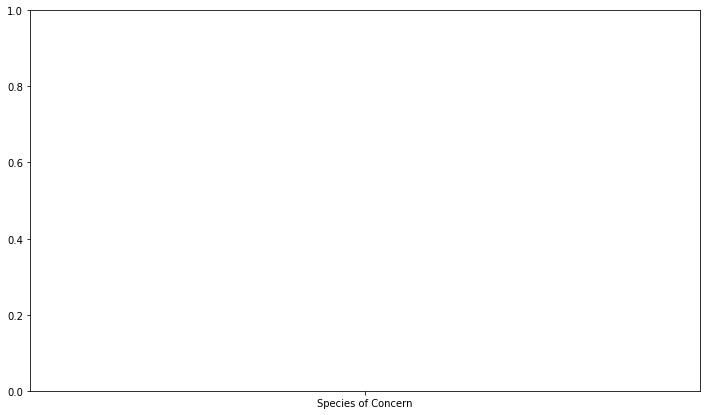

In [111]:
plt.subplots(figsize=(12,7))
ax = sns.histplot(data=bio,x='conservation_status')


In [112]:
bio

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
...,...,...,...,...
5819,Vascular Plant,Solanum parishii,Parish's Nightshade,NaN
5820,Vascular Plant,Solanum xanti,"Chaparral Nightshade, Purple Nightshade",NaN
5821,Vascular Plant,Parthenocissus vitacea,"Thicket Creeper, Virginia Creeper, Woodbine",NaN
5822,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN


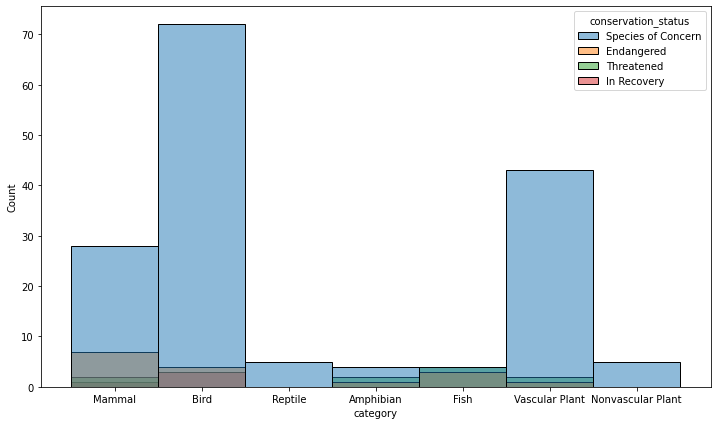

In [113]:
plt.subplots(figsize=(12,7))
ax = sns.histplot(data=bio,x='category',hue = 'conservation_status')


In [132]:
bio2 = bio[bio['conservation_status'].isna() == False]

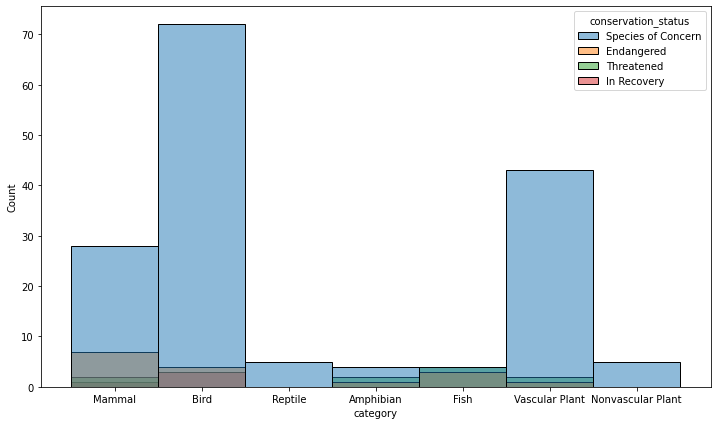

In [115]:
plt.subplots(figsize=(12,7))
ax = sns.histplot(data=bio,x='category',hue = 'conservation_status')


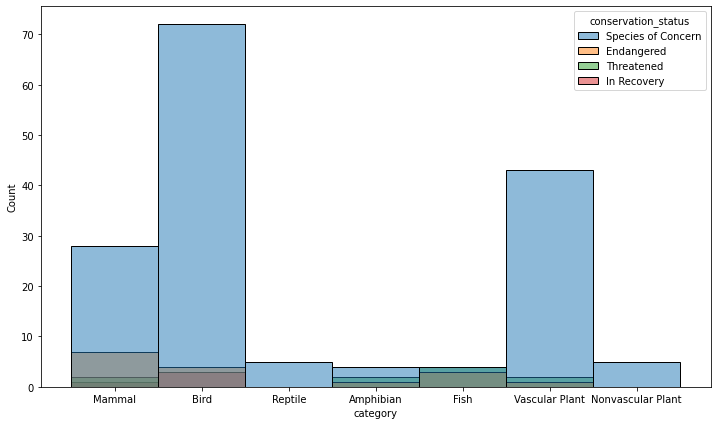

In [133]:
plt.subplots(figsize=(12,7))
ax = sns.histplot(data=bio2,x='category',hue = 'conservation_status')


In [117]:
obs

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [119]:
bio_obs=bio.merge(obs,on='scientific_name',how='left')

In [120]:
bio_obs

,category,scientific_name,common_names,conservation_status,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Bryce National Park,130
1,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yellowstone National Park,270
2,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Great Smoky Mountains National Park,98
3,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN,Yosemite National Park,117
4,Mammal,Bos bison,"American Bison, Bison",NaN,Yosemite National Park,128
...,...,...,...,...,...,...
25627,Vascular Plant,Vitis californica,"California Grape, California Wild Grape",NaN,Yellowstone National Park,237
25628,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN,Great Smoky Mountains National Park,50
25629,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN,Yellowstone National Park,239
25630,Vascular Plant,Tribulus terrestris,"Bullhead, Caltrop, Goathead, Mexican Sandbur, ...",NaN,Bryce National Park,111


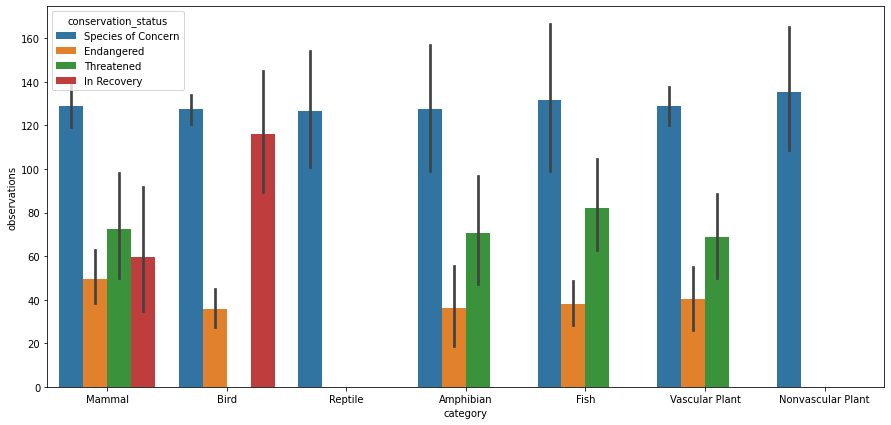

In [134]:
plt.subplots(figsize=(15,7))
ax = sns.barplot(data=bio_obs,x='category',y='observations',hue = 'conservation_status')


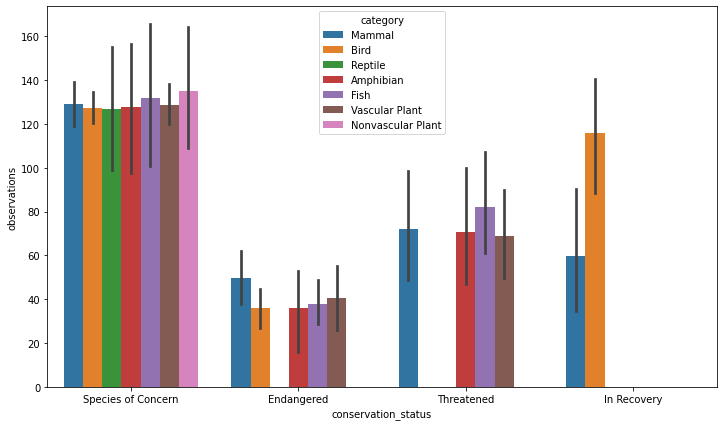

In [129]:
plt.subplots(figsize=(12,7))
ax = sns.barplot(data=bio_obs,x='conservation_status',y='observations',hue = 'category')


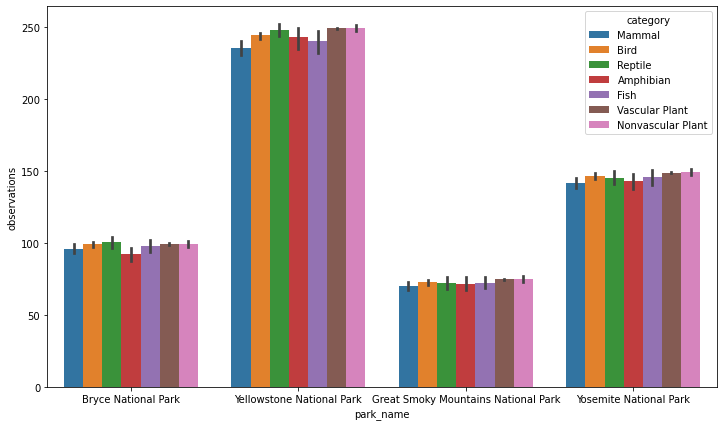

In [130]:
plt.subplots(figsize=(12,7))
ax = sns.barplot(data=bio_obs,x='park_name',y='observations',hue = 'category')


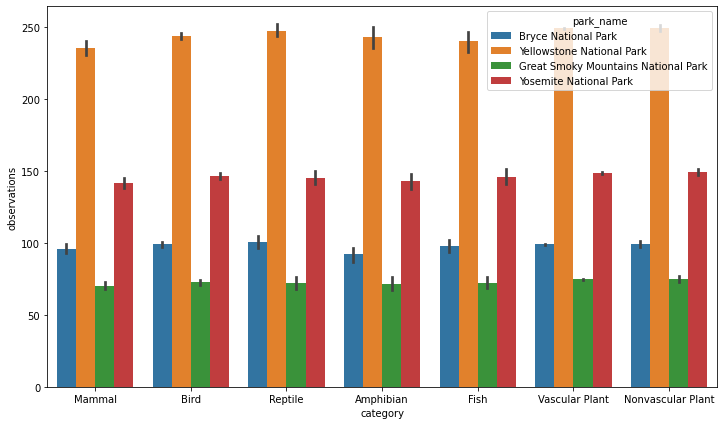

In [131]:
plt.subplots(figsize=(12,7))
ax = sns.barplot(data=bio_obs,x='category',y='observations',hue = 'park_name')


In [139]:
endangered  = bio_obs[bio_obs['conservation_status'] == 'Endangered']

In [140]:
endangered

,category,scientific_name,common_names,conservation_status,park_name,observations
44,Mammal,Canis lupus,Gray Wolf,Endangered,Yosemite National Park,35
45,Mammal,Canis lupus,Gray Wolf,Endangered,Bryce National Park,27
46,Mammal,Canis lupus,Gray Wolf,Endangered,Bryce National Park,29
47,Mammal,Canis lupus,Gray Wolf,Endangered,Bryce National Park,74
48,Mammal,Canis lupus,Gray Wolf,Endangered,Great Smoky Mountains National Park,15
...,...,...,...,...,...,...
20007,Bird,Gymnogyps californianus,California Condor,Endangered,Yellowstone National Park,64
20460,Amphibian,Rana sierrae,Sierra Nevada Yellow-Legged Frog,Endangered,Yosemite National Park,42
20461,Amphibian,Rana sierrae,Sierra Nevada Yellow-Legged Frog,Endangered,Yellowstone National Park,60
20462,Amphibian,Rana sierrae,Sierra Nevada Yellow-Legged Frog,Endangered,Bryce National Park,31


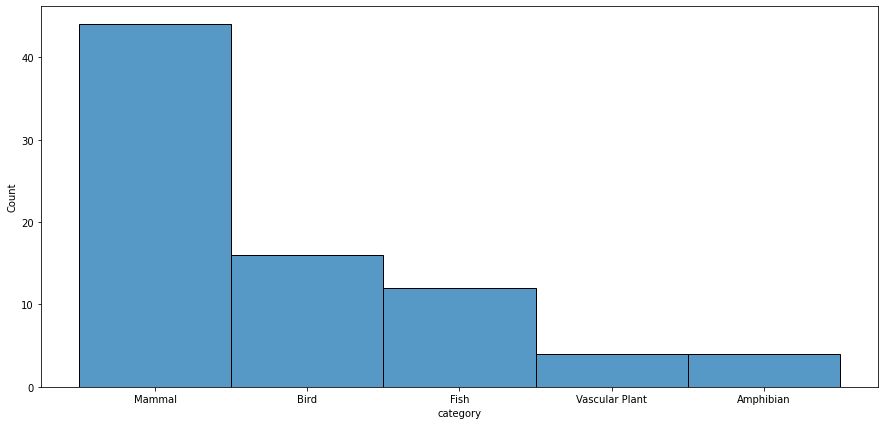

In [141]:
plt.subplots(figsize=(15,7))
ax = sns.histplot(data=endangered,x= 'category')

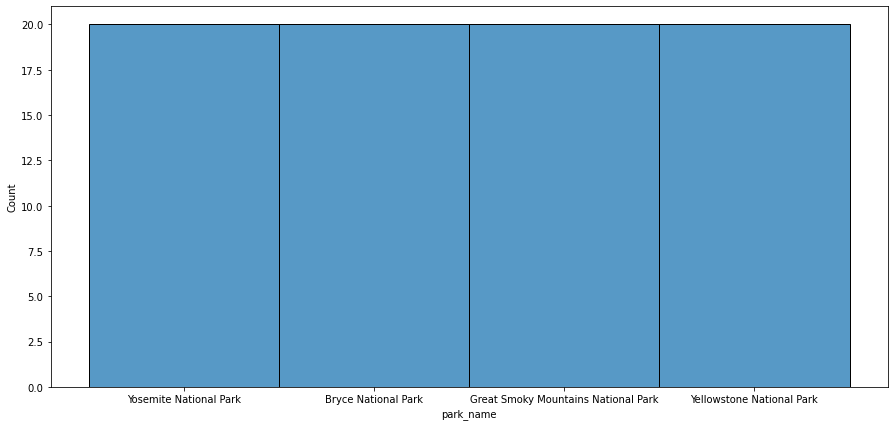

In [145]:
plt.subplots(figsize=(15,7))
ax = sns.histplot(data=endangered,x= 'park_name')

Yosemite National Park                 20
Yellowstone National Park              20
Great Smoky Mountains National Park    20
Bryce National Park                    20
Name: park_name, dtype: int64